# Background
## Literature

* The Mt /Mt /∞ **infinite-server model** was proposed for healthcare in 1976 by Collings and Stoneman 
* others have discovered …significant **time dependence** in the arrival rate and average occupancy levels of the ED 
* It is commonly accepted that the arrival process to an ED can be modeled by a **nonhomogeneous Poisson process (NHPP)**
* the authors propose a **two-time-scale model** of the LoS 
* a two-factor **statistical regression model with Gaussian residuals** for the daily total numbers of arrivals; see §§2.7, 3.7 and 6.5 of [26] for background

# Step 1 - Data overview

Figure 1 & Table 2

Lower totals in certain weeks, weeks 1 & 2 was Hanukkah. Unexplained dip in week 10 visible. 

# Step 2 - ED arrival process, total daily number

Examines **NHPP** (Figures A & B). Notes some overdispersion. States is is *roughly consistent* with Poisson.

Run two factor regression. **Table 3** ANOVA table created to show if both factors are significant.

As the P-values are low, both factors are significant.

Discards *week* as a factor as unsure of the week effect, and DoW is easier to model.

**Why are the standard errors all the same?**

Figure C red line shows $\hat{y}$.

Figure D shows $residuals$. Variance is constant (as assumed by linear regression) and our model is simple, with equal numbers in each group, the standard error will be the same.

Formally, if the design matrix $X$ is *orthogonal* the S.E. will be the same. An orthogonal matrix is a square matrix where $ X^TX = I$.
*(See Regression coefficients)*

$$ 
X = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1\\
\end{bmatrix}
$$




In [12]:
import numpy as np; X = np.eye(7); 
X * X.T

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

**Residuals**

A Q-Q plot shows if data came from a distribution, usually the normal distribution.

Fig 2 shows our errors to be normally distributed, centred around 0.

# Step 3 - ED arrival within days

Fig 3 shows differences between days, Fig 4 (normalised) still shows differences, but cumsum figure shows more regularity,  lower rate from midnight to 9, higher rate from 9 to 12. However, simulations were run and this model was discounted.


**NHPP** is commonly accepted in other literature as a suitable model. The author sets about confirming this using the Rambam data.

> "Fig. 5 provides strong evidence that
the overall arrival process is not too well modeled as an NHPP,
but is quite well modeled as a conditional NHPP, where the arrival
process conditional on the daily total is regarded as an NHPP."

Cites this confirms conclusions in other literature, but showing it using IDC as he does is new.

Describes a few more statistical tests to confirm this.

# Step 4 - Admitted vs non-admitted arrivals

Splits arrivals into two groups. Looks at variability over DoW and time of day. Fig 6, A Fig 15 and Fig 7.

Looking at the trend, he fits a quadratic equation to the data.

# Step 5 - LoS

Plots a number of histograms to examine the data.

Histogram bin size can be difficult to select and alter the distribution shape. Empirical cumulative distribution functions (ECDFs) don’t have the binning issue.

He invesitages a $G_t/GI/\infty$ model but dismisses it as not accurate.

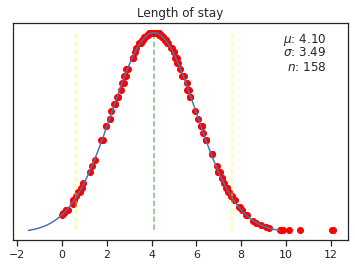

In [2]:
from distributions import *
# pltdist(title='Length of stay'); 
pltdist(los, title='Length of stay'); 

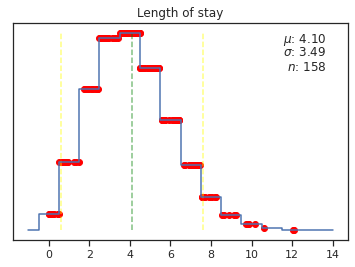

In [3]:
# pltdist(dist=poisson, title='Length of stay', drawstyle='steps-mid');
pltdist(los, dist=poisson, title='Length of stay', drawstyle='steps-mid');

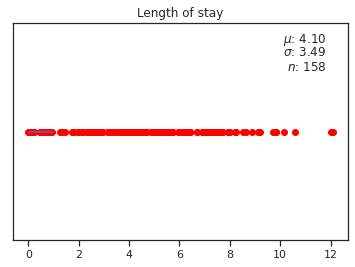

In [5]:
pltdist(los, dist=constant, title='Length of stay');

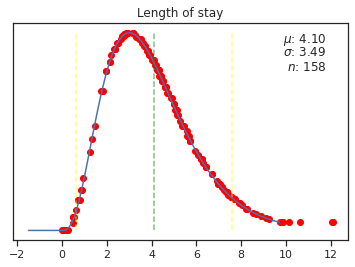

In [7]:
# pltdist(dist=erlang, title='Length of stay');
pltdist(los, dist=erlang, title='Length of stay');

![](Queues/Queues.001.jpeg)

![](Queues/Queues.002.jpeg)